<a href="https://colab.research.google.com/github/Aarya718/Cognifyz-Technologies-/blob/main/Location_basedAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - Aarya Ramchandra Tarphe

Batch - February 2025

Position - Machine Learning Intern

Task-4 : Location-Based Analysis

Objective: Perform a geographical analysis of the
restaurants in the dataset.

# Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Loading the Dataset

In [2]:
df = pd.read_csv("/content/Dataset .csv")

# Using fuctions to view dataset

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df.shape

(9551, 21)

# Data Cleaning

In [14]:
df.drop(["Restaurant ID", "Switch to order menu"], axis=1, inplace=True)

In [15]:
df.dropna(subset=["Cuisines", "City", "Latitude", "Longitude"], inplace=True)

In [16]:
df["Aggregate rating"].fillna(df["Aggregate rating"].median(), inplace=True)

<ipython-input-16-cd1aff1b8c39>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Aggregate rating"].fillna(df["Aggregate rating"].median(), inplace=True)


In [17]:
df["Aggregate rating"].fillna(df["Aggregate rating"].median(), inplace=True)

<ipython-input-17-cd1aff1b8c39>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Aggregate rating"].fillna(df["Aggregate rating"].median(), inplace=True)


In [18]:
df.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country',
       'Price Category'],
      dtype='object')

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df["Average Cost for two"] = np.log1p(df["Average Cost for two"])

# Data Pre-Processing

In [10]:
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
country_mapping = {1: "India", 14: "USA", 30: "Brazil"}
df["Country"] = df["Country Code"].map(country_mapping)

In [8]:
df["Has Online delivery"] = df["Has Online delivery"].map({"Yes": 1, "No": 0})

In [11]:
scaler = StandardScaler()
df[["Votes", "Aggregate rating", "Price range"]] = scaler.fit_transform(df[["Votes", "Aggregate rating", "Price range"]])

In [13]:
df["Price Category"] = pd.cut(df["Price range"], bins=[0, 1, 2, 3, 4], labels=["Cheap", "Affordable", "Expensive", "Luxury"])

# Data Visualization

In [21]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

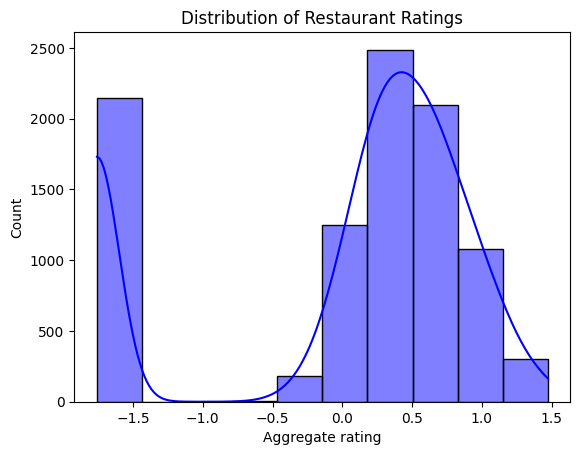

In [22]:
sns.histplot(df["Aggregate rating"], bins=10, kde=True, color="blue")
plt.title("Distribution of Restaurant Ratings")
plt.show()

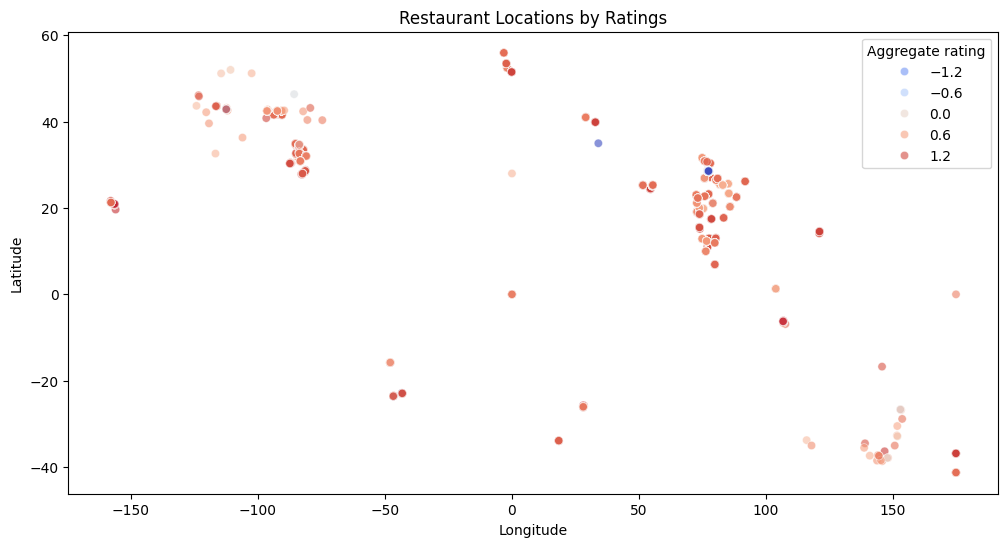

In [23]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="Aggregate rating", palette="coolwarm", alpha=0.6)
plt.title("Restaurant Locations by Ratings")
plt.show()


<ipython-input-24-cde15104221f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Price Category", data=df, palette="viridis")


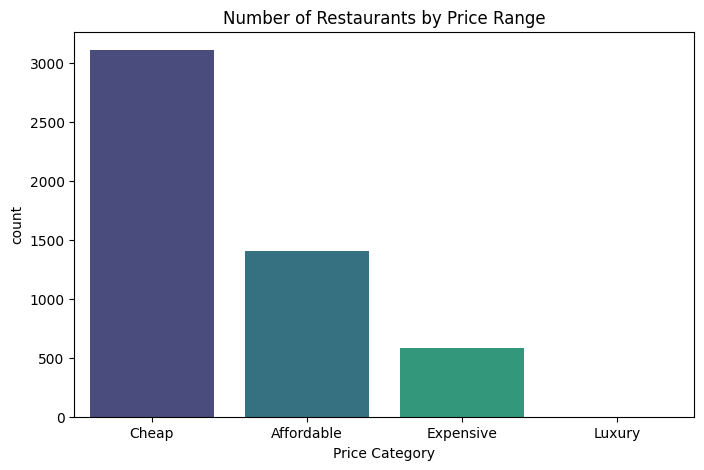

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Price Category", data=df, palette="viridis")
plt.title("Number of Restaurants by Price Range")
plt.show()

<ipython-input-25-8ee33f913ded>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Price Category", y="Votes", data=df, palette="magma")


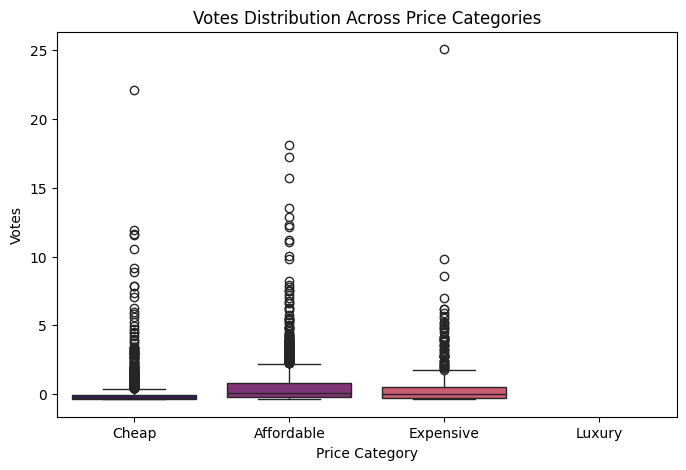

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Price Category", y="Votes", data=df, palette="magma")
plt.title("Votes Distribution Across Price Categories")
plt.show()

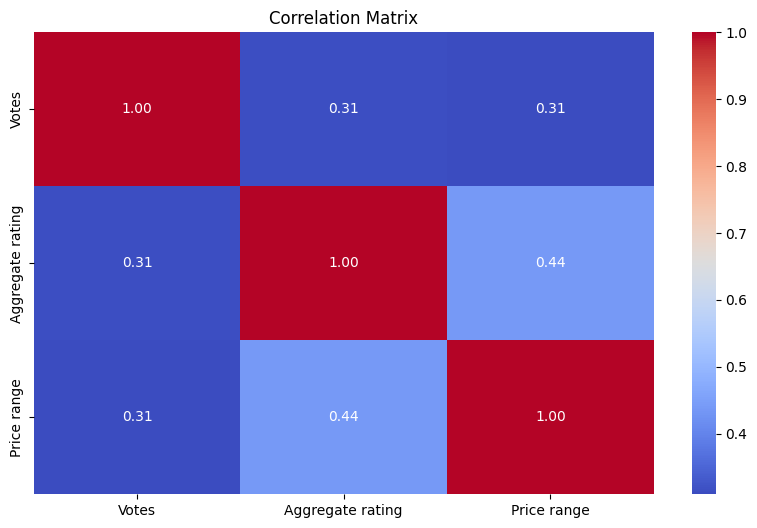

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[["Votes", "Aggregate rating", "Price range"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Feature Engineering

In [27]:
df["Popularity Score"] = df["Aggregate rating"] * df["Votes"]

# K-Means Clustering Algorithm

In [28]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Latitude", "Longitude"]])

In [29]:
map_center = [df["Latitude"].mean(), df["Longitude"].mean()]
m = folium.Map(location=map_center, zoom_start=5)

In [30]:
heat_data = df[["Latitude", "Longitude", "Aggregate rating"]].values.tolist()
HeatMap(heat_data).add_to(m)

In [31]:
m.save("restaurant_map.html")
m

# Coclusion

Hence successfully implemented Location-based Analysis by using K-Means Clustering Machine learning algorithm.